In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# read the file
df_x = pd.read_csv('eval_x.csv')
# add a column for expert
df_x['expert'] = False
# read the file
df_y = pd.read_csv('eval_xe.csv')
# add a column for expert
df_y['expert'] = True
# concat
df = pd.concat([df_x, df_y])
# save to csv
df.to_csv('eval.csv', index=False)

In [ ]:
# use seaborn to plot
sns.set()
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
# plot
fig, axs = plt.subplots(3, 4, figsize=(40, 20))
sns.lineplot(x='mass_x', y='rew', hue='expert', data=df, ax=axs[0,0], errorbar=('sd', 0.2))
sns.lineplot(x='mass_y', y='rew', hue='expert', data=df, ax=axs[0,1], errorbar=('sd', 0.2))
sns.lineplot(x='mass_z', y='rew', hue='expert', data=df, ax=axs[0,2], errorbar=('sd', 0.2))
sns.lineplot(x='decay_x', y='rew', hue='expert', data=df, ax=axs[1,0], errorbar=('sd', 0.2))
sns.lineplot(x='decay_y', y='rew', hue='expert', data=df, ax=axs[1,1], errorbar=('sd', 0.2))
sns.lineplot(x='decay_z', y='rew', hue='expert', data=df, ax=axs[1,2], errorbar=('sd', 0.2))
sns.lineplot(x='param_0', y='rew', hue='expert', data=df, ax=axs[2,0], errorbar=('sd', 0.2))
sns.lineplot(x='param_1', y='rew', hue='expert', data=df, ax=axs[2,1], errorbar=('sd', 0.2))
sns.lineplot(x='param_2', y='rew', hue='expert', data=df, ax=axs[2,2], errorbar=('sd', 0.2))
sns.lineplot(x='param_3', y='rew', hue='expert', data=df, ax=axs[2,3], errorbar=('sd', 0.2))

In [ ]:
# save the plot
plt.savefig('sensitivity.png')

In [ ]:
df[df['mass_x']==0.006].var()

In [ ]:
import torch
from icecream import ic
# set ic float precision to 3
# vanilla = torch.load('/home/pcy/rl/policy-adaptation-survey/results/rl/ppo_mlp_vanilla_Dw1.pt')
# ic(vanilla['expert_err_x_final'], vanilla['adapt_err_x_initial'], vanilla['adapt_err_x_end'])
# expert_Dw0 = torch.load('/home/pcy/rl/policy-adaptation-survey/results/rl/ppo_mlp_expert_Dw0.pt')
# ic(expert_Dw0['expert_err_x_final'], expert_Dw0['adapt_err_x_initial'], expert_Dw0['adapt_err_x_end'])
expert_Dw1 = torch.load('/home/pcy/rl/policy-adaptation-survey/results/rl/ppo_RMA.pt')
ic(expert_Dw1['expert_err_x_final'], expert_Dw1['adapt_err_x_initial'], expert_Dw1['adapt_err_x_end'])
# expert_Dw1_C4 = torch.load('/home/pcy/rl/policy-adaptation-survey/results/rl/ppo_mlp_expert_Dw1_C4.pt')
# ic(expert_Dw1_C4['expert_err_x_final'], expert_Dw1_C4['adapt_err_x_initial'], expert_Dw1_C4['adapt_err_x_end'])
# print(f"|{vanilla['expert_err_x_final']:.4f}|{vanilla['adapt_err_x_initial']:.4f}|{vanilla['adapt_err_x_end']:.4f}|")
# print(f"|{expert_Dw0['expert_err_x_final']:.4f}|{expert_Dw0['adapt_err_x_initial']:.4f}|{expert_Dw0['adapt_err_x_end']:.4f}|")
print(f"|{expert_Dw1['expert_err_x_final']:.4f}|{expert_Dw1['adapt_err_x_initial']:.4f}|{expert_Dw1['adapt_err_x_end']:.4f}|")

# print(f"|{expert_Dw1_C4['expert_err_x_final']:.4f}|{expert_Dw1_C4['adapt_err_x_initial']:.4f}|{expert_Dw1_C4['adapt_err_x_end']:.4f}|")

In [ ]:
# load torch module
import torch
# load the model
model = torch.load('/home/pcy/rl/policy-adaptation-survey/results/rl/ppo_RMA3.pt')
compressor = model['compressor'].to('cpu')
err = model['expert_err_x_final']

In [ ]:
# create xyz from a sphere with torch
theta = torch.linspace(0, 2*torch.pi, 100)
phi = torch.linspace(0, torch.pi, 50)
x = torch.outer(torch.cos(theta), torch.sin(phi))
y = torch.outer(torch.sin(theta), torch.sin(phi))
z = torch.outer(torch.ones(theta.shape), torch.cos(phi))
xyz = torch.stack([x, y, z], dim=-1).reshape(-1, 3)
x = x.reshape(-1, 1)
xyz = torch.cat([x, torch.zeros([x.shape[0],2])], dim=-1)
# passing xyz to network
xyz = xyz.to('cpu')
xyz_compressed = compressor(torch.cat([torch.zeros([xyz.shape[0], 3]), xyz,torch.zeros([xyz.shape[0], 12-3-3])], dim=-1))
err = torch.arange(5000)/5000
# plot orginal xyz and compressed xyz side by side with color mapping
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
ax1.scatter(xyz[:, 0], xyz[:, 1], xyz[:, 2], c=err, cmap='jet')
ax2.scatter(xyz_compressed[:, 0], xyz_compressed[:, 1], xyz_compressed[:, 2], c=err, cmap='jet')
# set title
ax1.set_title('original xyz')
ax2.set_title('compressed xyz')
# set all title
plt.suptitle('mass OOD')

In [ ]:
import torch

expert_model = torch.load('/home/pcy/rl/policy-adaptation-survey/results/rl/ppo_hover1dadaptive.pt', map_location=torch.device('cpu'))
expert_policy = expert_model['actor']
expert_compress = expert_model['compressor']
robust_model = torch.load('/home/pcy/rl/policy-adaptation-survey/results/rl/ppo_robusthover1d.pt', map_location=torch.device('cpu'))
robust_policy = robust_model['actor']

obs = torch.zeros([1, 4+10])
e = torch.ones([1,1]) * (1.0)

ic(expert_policy(obs, expert_compress(e)))
ic(robust_policy(obs, None))

In [ ]:
# plot expert_policy(obs, expert_compress(e)) in e from -1 to 1
import matplotlib.pyplot as plt
import numpy as np
es = np.linspace(-1, 1, 100, dtype=np.float32)
mass = np.zeros([100])
force = np.zeros([100])
gravity = np.zeros([100])
for i, e in enumerate(es):
    force[i] = expert_policy(obs, expert_compress(torch.tensor([[e]])))[0][0]
    mass[i] = 0.05 + 0.02 * e
    gravity[i] = mass[i] * 9.81
plt.plot(mass, force, label='force')
plt.plot(mass, gravity, label='gravity')
# plot horizontal line at y = 0.6086
plt.axhline(y=0.6086, color='r', linestyle='--', label='robust')
plt.legend()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# set theme
sns.set_theme(style="darkgrid")
# load data
data_bullet = pd.read_csv('/home/pcy/rl/gym-quad/gym_quad/results/test.csv')[2500:2700]
data_torch = pd.read_csv('/home/pcy/rl/policy-adaptation-survey/adaptive_control_gym/envs/results/test.csv')[2500:2700]
data_bullet['xyz_drones_2'] -= 5.0
data_bullet['xyz_obj_2'] -= 5.0
# plot
fig, axs = plt.subplots(len(data_bullet.columns), 1, figsize=(5, 2*len(data_bullet.columns)))
for i, col in enumerate(data_bullet.columns):
    sns.lineplot(data=data_bullet, x='time', y=col, ax=axs[i], label='bullet')
    sns.lineplot(data=data_torch, x='time', y=col, ax=axs[i], linestyle='--', label='torch')
    axs[i].set_xlabel('time')
    axs[i].set_ylabel(col)
    axs[i].legend()

In [ ]:
# set theme
sns.set_theme(style="darkgrid")
# load data
data_torch = pd.read_csv('/home/pcy/rl/policy-adaptation-survey/adaptive_control_gym/envs/results/test.csv')[2500:2700]
# plot vrpy_drones_0 column
fig, axs = plt.subplots(1, 1, figsize=(8, 3))
sns.lineplot(data=data_torch, x='time', y='vrpy_drones_0', ax=axs, label='vrpy_drones_0')

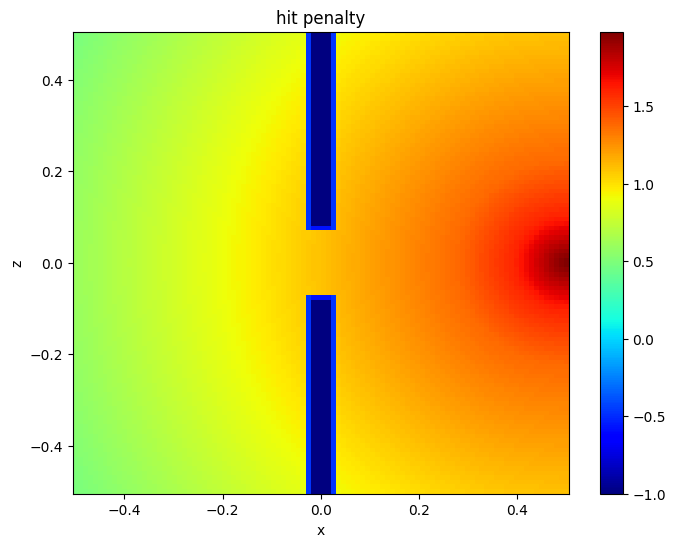

In [36]:
import torch


def get_hit_penalty(xz):
    xyz = torch.cat([xz[..., [0]], torch.zeros([xz.shape[0], 1]), xz[..., [1]]], dim=-1)
    within_obs_x_range = torch.abs(xyz[:, 0]) < 0.03
    outof_obs_z_range = torch.abs(xyz[:, 2]) > 0.07

    hit_x_bound = within_obs_x_range & outof_obs_z_range

    hit_panelty = - torch.clip(hit_x_bound.float() * torch.min(0.03-torch.abs(xyz[:, 0]), torch.abs(xyz[:, 2])-0.07) * 100.0, -1, 1)
    return hit_panelty

def get_reward(xz):
    err_x = torch.norm(xz - torch.tensor([0.5, 0.0]), dim=1)
    reward = 1.0 - torch.clip(err_x, 0, 2)*0.5
    reward -= torch.clip(torch.log(err_x+1)*5, 0, 1)*0.1  # for 0.2
    reward -= torch.clip(torch.log(err_x+1)*10, 0, 1)*0.1  # for 0.1
    panelty = get_hit_penalty(xz)
    return reward * (panelty >= 0.0) * 2.0 + panelty * 1.0

# plot the heatmap of hit penalty
import matplotlib.pyplot as plt

# generate meshgrid with torch
x = torch.linspace(-0.5, 0.5, 100)
z = torch.linspace(-0.5, 0.5, 100)
X, Z = torch.meshgrid(x, z)
xz = torch.cat([X.reshape(-1, 1), Z.reshape(-1, 1)], dim=-1)
hit_penalty = get_reward(xz).reshape(100, 100)
# plot
fig, axs = plt.subplots(1, 1, figsize=(8, 6))
axs.pcolormesh(X, Z, hit_penalty, cmap='jet')
axs.set_xlabel('x')
axs.set_ylabel('z')
axs.set_title('hit penalty')
# color value bar
fig.colorbar(axs.pcolormesh(X, Z, hit_penalty, cmap='jet'), ax=axs)